In [ ]:
import pandas as pd
%config IPCompleter.greedy=True
pd.set_option("max_rows", 1000)

# Web Crawling

In [153]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
from statsmodels.tsa.stattools import adfuller
import requests
from selenium.webdriver.common.action_chains import ActionChains


list_2  = pd.DataFrame()
list_1 = []
def extraction(no_of_time):
    chromeOptions = webdriver.ChromeOptions()
    chromeOptions.add_experimental_option('useAutomationExtension', False)
    driver = webdriver.Chrome(r"C:\Users\shubham bhatt\Downloads\chromedriver",chrome_options=chromeOptions, desired_capabilities=chromeOptions.to_capabilities())

    driver.maximize_window()
    driver.get("http://www.indianspices.com/marketing/price/domestic/daily-price?v=archive&category=small")
    time.sleep(2)
    for i in range(no_of_time):
        if i == 0:
            res = driver.execute_script("return document.documentElement.outerHTML")
        else:
            driver.find_element_by_class_name('pager-next').click()
            time.sleep(2)
            res = driver.execute_script("return document.documentElement.outerHTML")
        soup = BeautifulSoup(res, 'lxml')
        ################ Put into EXcel##################
        #ws = wb.add_sheet(country+wgt1)
        table = soup.findAll('tbody')[1]
        rows = table.findAll("tr")
        for tr in rows[2:]:
            cols = tr.findAll("td")
            list_1.append([i.text for i in cols])
    driver.close()
    return list_1

In [155]:
Ext_Data  = extraction(74)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


In [156]:
data = pd.DataFrame(Ext_Data)

In [157]:
data.columns = ['Sno', 'Date of Auction', 'Auctioneer', 'No.of Lots', 'Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)', 'MaxPrice (Rs./Kg)', 'Avg.Price (Rs./Kg)']

In [158]:
data.head()

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,1,31-10-2019,The Cardamom Processing & Marketing Co-Operati...,212,41865.5,41491.1,2795,2376.84
1,2,31-10-2019,"Cardamom Planters' Association, Santhanpara",116,15319,13970.6,2719,2380.48
2,3,30-10-2019,"South Indian Green Cardamom Company Ltd, Kochi",145,26409.9,26409.9,2865,2465.79
3,4,30-10-2019,Green House Cardamom Mktg.India Pvt. Ltd,41,5621.6,4521.1,2466,2367.57
4,5,29-10-2019,"Spice More Trading Company, Kumily",86,15562.1,15562.1,2712,2434.8


In [159]:
# Saving data for later use
data.to_csv(r"C:\Users\shubham bhatt\Downloads\data.csv",index = False )

In [ ]:
##############   QUESTIONS   ###################################
################################################################

In [511]:
import pandas as pd
data = pd.read_csv(r"C:\Users\shubham bhatt\Downloads\data.csv", parse_dates=['Date of Auction'])

In [427]:
data.head()

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,1,2019-10-31,The Cardamom Processing & Marketing Co-Operati...,212,41865.5,41491.1,2795.0,2376.84
1,2,2019-10-31,"Cardamom Planters' Association, Santhanpara",116,15319.0,13970.6,2719.0,2380.48
2,3,2019-10-30,"South Indian Green Cardamom Company Ltd, Kochi",145,26409.9,26409.9,2865.0,2465.79
3,4,2019-10-30,Green House Cardamom Mktg.India Pvt. Ltd,41,5621.6,4521.1,2466.0,2367.57
4,5,2019-10-29,"Spice More Trading Company, Kumily",86,15562.1,15562.1,2712.0,2434.80


# Which Auctioneer sold maximum amount of cardamon in last 3 month?

In [428]:
data[data['Date of Auction'] >'2019-08-01'].groupby('Auctioneer')['Qty Sold (Kgs)'].sum()

Auctioneer
CARDAMOM GROWERSFOREVER PRIVATE LIMITED                                    229905.9
Cardamom Planters' Association, Santhanpara                                264891.5
Green House Cardamom Mktg.India Pvt. Ltd                                   268181.5
Header Systems (India) Limited, Nedumkandam                                845104.9
IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd                      405188.9
Mas Enterprises, Vandanmettu                                               680543.5
SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd                              416492.1
South Indian Green Cardamom Company Ltd, Kochi                            1203744.5
Spice More Trading Company, Kumily                                         526277.3
THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE SOCIETY LIMITED               786642.8
The Cardamom Processing & Marketing Co-Operative Society Ltd, Kumily       453041.2
The Kerala Cardamom Processing and Marketing Company Limited, The

# What is the predicted price for upcoming lots for following auctioneer:
# a) The Kerala Cardamom Processing and Marketing Company Limited, # 2944.476874
# b) Header Systems (India) Limited, Nedumkandam # 3260.103176
# c) The Cardamom Processing & Marketing Co-Operative Society Ltd, Kumily # 1584.548692
# d) Spice More Trading Company, Kumily # 2944.476874
# e) Mas Enterprises, Vandanmettu # 3294.033497

In [512]:
data.drop(columns = "Sno", inplace = True)

In [513]:
data.describe(include = "all")

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
count,2310,2310,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
unique,1287,14,NaN,NaN,NaN,NaN,NaN
top,2019-10-17 00:00:00,"South Indian Green Cardamom Company Ltd, Kochi",NaN,NaN,NaN,NaN,NaN
freq,4,206,NaN,NaN,NaN,NaN,NaN
first,2015-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,249.341558,49041.075671,47392.712641,1541.412771,1232.314693
std,NaN,NaN,116.685864,30296.891315,29816.159863,847.221352,776.157939
min,NaN,NaN,25.000000,4048.600000,0.000000,0.000000,0.000000
25%,NaN,NaN,164.000000,26216.400000,24951.775000,1036.000000,727.952500


In [514]:
data.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,2019-10-31,The Cardamom Processing & Marketing Co-Operati...,212,41865.5,41491.1,2795.0,2376.84
1,2019-10-31,"Cardamom Planters' Association, Santhanpara",116,15319.0,13970.6,2719.0,2380.48
2,2019-10-30,"South Indian Green Cardamom Company Ltd, Kochi",145,26409.9,26409.9,2865.0,2465.79
3,2019-10-30,Green House Cardamom Mktg.India Pvt. Ltd,41,5621.6,4521.1,2466.0,2367.57
4,2019-10-29,"Spice More Trading Company, Kumily",86,15562.1,15562.1,2712.0,2434.80


In [515]:
data["month"] = data['Date of Auction'].dt.month
data["year"] = data['Date of Auction'].dt.year
data["day"] = data['Date of Auction'].dt.day

In [516]:
import matplotlib.pyplot as plt

pd.pivot_table(data, values = 'Avg.Price (Rs./Kg)', index = "Auctioneer", aggfunc = 'sum')

,Avg.Price (Rs./Kg)
Auctioneer,
CARDAMOM GROWERSFOREVER PRIVATE LIMITED,218963.92
"Cardamom Planters' Association, Santhanpara",181566.62
Green House Cardamom Mktg.India Pvt. Ltd,219279.80
"Header Systems (India) Limited, Nedumkandam",252081.30
IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd,240610.63
"Mas Enterprises, Vandanmettu",251363.61
STATE TRADING CORPORATION,110155.86
SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,247152.55
"South Indian Green Cardamom Company Ltd, Kochi",262495.30


In [517]:
pd.pivot_table(data, values = 'Avg.Price (Rs./Kg)', index = "month", aggfunc = 'sum')

,Avg.Price (Rs./Kg)
month,
1,177749.86
2,177817.69
3,202549.58
4,185154.29
5,251777.05
6,239234.81
7,277265.31
8,265934.42
9,351798.77


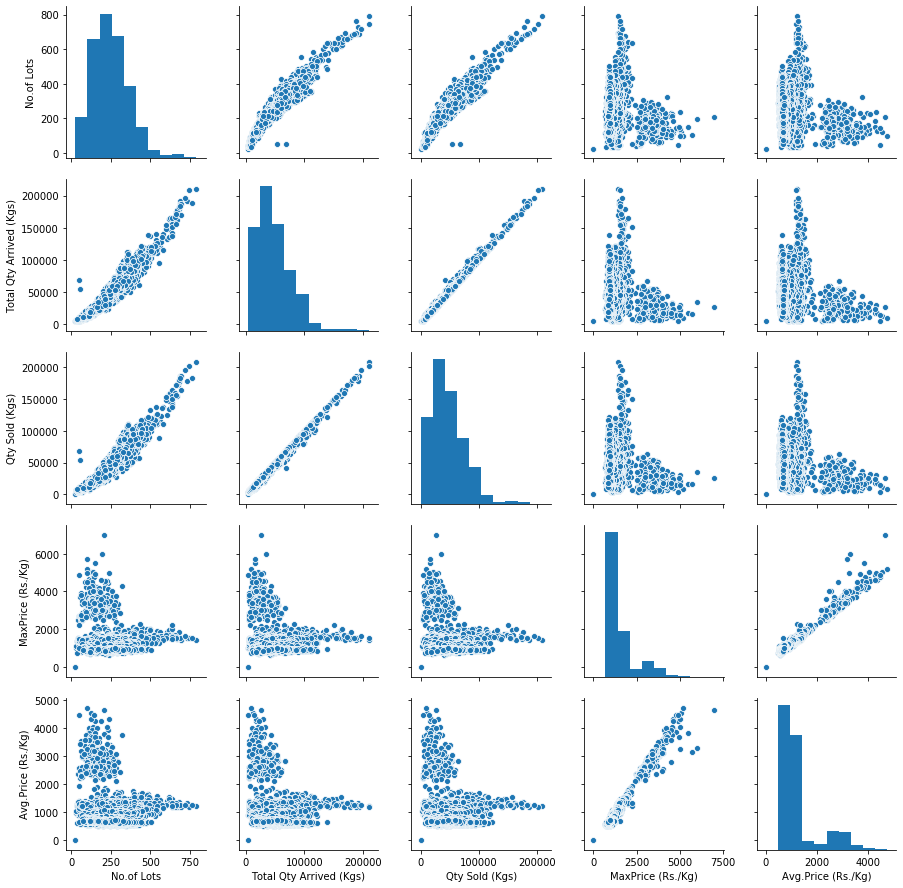

In [434]:
import seaborn as sns
sns.pairplot(data)

In [435]:
#checking if any null values if present
data.isnull().sum()

Date of Auction            0
Auctioneer                 0
No.of Lots                 0
Total Qty Arrived (Kgs)    0
Qty Sold (Kgs)             0
MaxPrice (Rs./Kg)          0
Avg.Price (Rs./Kg)         0
dtype: int64

In [491]:
a = data[data['Auctioneer'] == "The Kerala Cardamom Processing and Marketing Company Limited, Thekkady"].sort_values("Date of Auction")
b = data[data['Auctioneer'] == "Header Systems (India) Limited, Nedumkandam"].sort_values("Date of Auction")
c = data[data['Auctioneer'] == "The Cardamom Processing & Marketing Co-Operative Society Ltd, Kumily"].sort_values("Date of Auction")
d = data[data['Auctioneer'] == "The Kerala Cardamom Processing and Marketing Company Limited, Thekkady"].sort_values("Date of Auction")
e = data[data['Auctioneer'] == "Spice More Trading Company, Kumily"].sort_values("Date of Auction")
f = data[data['Auctioneer'] == "Mas Enterprises, Vandanmettu"].sort_values("Date of Auction")

In [492]:
a.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
2118,2015-01-10,The Kerala Cardamom Processing and Marketing C...,307,87790.0,85987.0,939.0,658.52
2209,2015-02-07,The Kerala Cardamom Processing and Marketing C...,170,30303.0,30303.0,890.0,649.60
2022,2015-03-12,The Kerala Cardamom Processing and Marketing C...,346,101031.0,100384.0,902.0,601.82
2255,2015-04-06,The Kerala Cardamom Processing and Marketing C...,143,29220.0,29007.0,879.0,633.60
2062,2015-05-11,The Kerala Cardamom Processing and Marketing C...,320,84340.0,84340.0,912.0,608.63


In [493]:
def cleanin_data(dat):
    dat = dat[["Date of Auction","year", "month","Avg.Price (Rs./Kg)"]].sort_values("Date of Auction")
    dat.drop_duplicates(inplace = True)
    dat['year-month'] = dat["year"].astype(str)+"-"+dat["month"].astype(str)
    dat = dat.groupby('year-month')['year-month','Avg.Price (Rs./Kg)'].mean().reset_index()
    dat['year-month'] = pd.to_datetime(dat['year-month'])
    dat.sort_values("year-month", inplace = True)
    dat.set_index('year-month', inplace = True)
    return dat

In [494]:
a = cleanin_data(a)
b = cleanin_data(b)
c = cleanin_data(c)
d = cleanin_data(d)
e = cleanin_data(e)

In [495]:
a.head()

,Avg.Price (Rs./Kg)
year-month,
2015-01-01,658.520
2015-02-01,649.600
2015-03-01,601.820
2015-04-01,633.600
2015-05-01,647.075


In [496]:
def plot_ing(rows, cols, *vararg):
    j = 1
    for dat in vararg:
        plt.subplot(rows, cols, j) 
        plt.plot(dat['Avg.Price (Rs./Kg)'], label='Avg.Price (Rs./Kg)') 
        plt.title('Time Series')
        plt.tick_params(labelrotation = 45)
        plt.xlabel("Time(year-month)")
        plt.ylabel('Avg.Price (Rs./Kg)') 
        plt.legend(loc='best')
        j +=1
        plt.show()

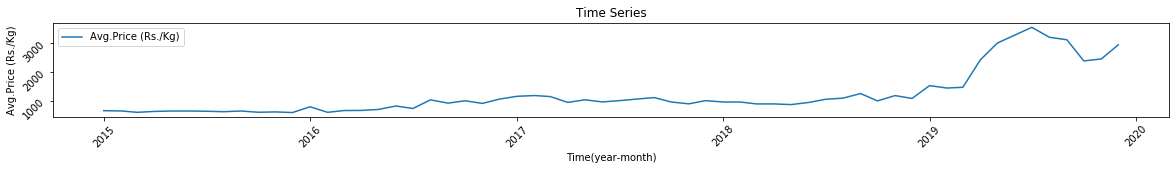

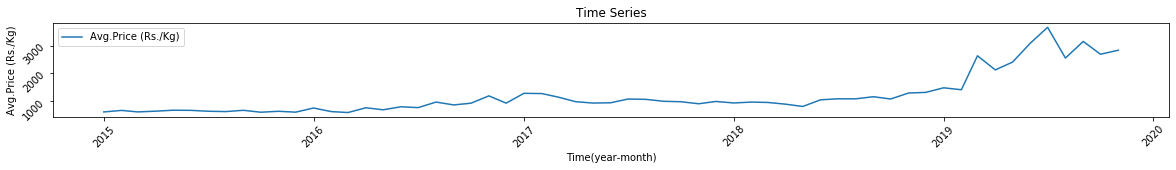

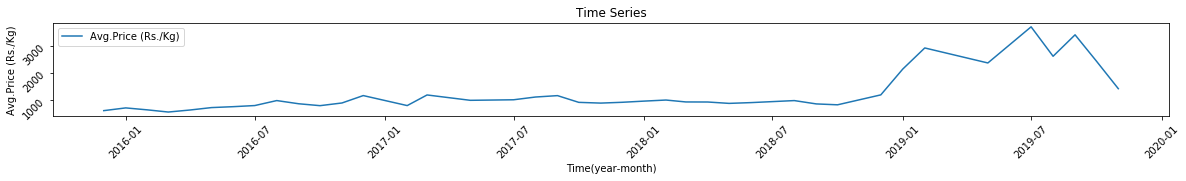

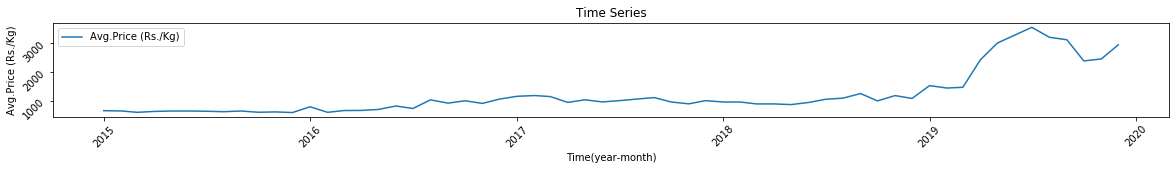

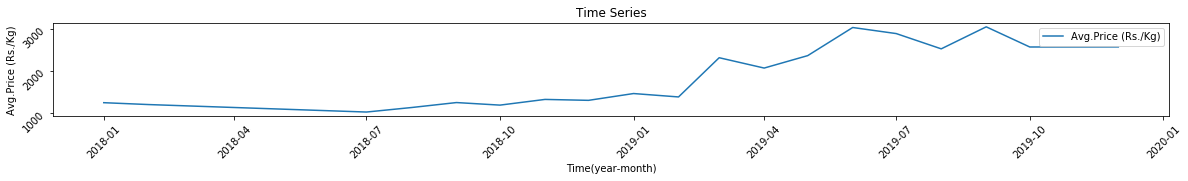

In [497]:
plot_ing(5, 1, a,b,c,d,e)

In [498]:
#normalising the data
a = log(a)
b = log(b)
c = log(c)
d = log(d)
e = log(e)

In [499]:
from fbprophet import Prophet

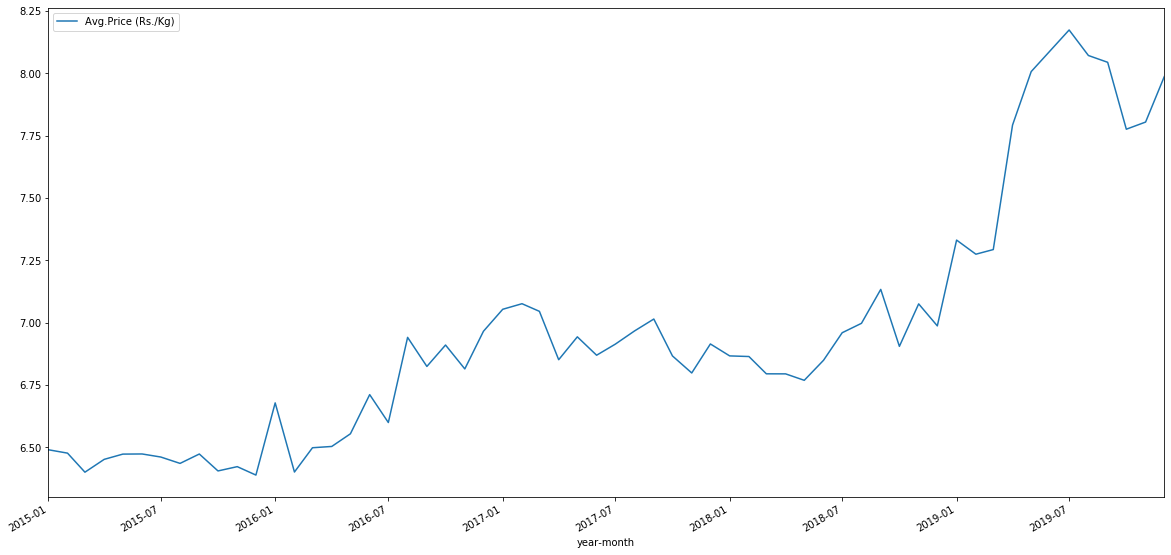

In [500]:
a.plot()

In [501]:
def fitting_Predict(data):
#     data = np.log(data)
    data.reset_index(inplace = True)
    data.columns = ["ds", "y"]
    m = Prophet()
    m.fit(data)
    future = m.make_future_dataframe(periods =10, freq = "M", include_history = True)
    forecast = m.predict(future)
    Predicted_data= pd.DataFrame(forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']]) 
    Predicted_data['yhat'] = pd.Series(np.exp(Predicted_data['yhat']))
    return Predicted_data, m.plot(forecast), m.plot_components(forecast)


# Fitting and Predicting the values for each auctioner

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(           ds         yhat  yhat_lower  yhat_upper
 0  2015-01-01   644.248751    6.319701    6.605176
 1  2015-02-01   565.303206    6.195979    6.473865
 2  2015-03-01   548.794549    6.165125    6.451997
 3  2015-04-01   638.278444    6.310480    6.586768
 4  2015-05-01   670.479912    6.366289    6.643270
 5  2015-06-01   549.142972    6.167205    6.437478
 6  2015-07-01   732.485286    6.458056    6.730700
 7  2015-08-01   676.556951    6.369493    6.652146
 8  2015-09-01   717.733293    6.438795    6.719941
 9  2015-10-01   583.086230    6.239941    6.515979
 10 2015-11-01   619.942958    6.292988    6.560778
 11 2015-12-01   621.683611    6.277648    6.567023
 12 2016-01-01   848.714838    6.609799    6.888722
 13 2016-02-01   660.890947    6.346584    6.623645
 14 2016-03-01   744.242174    6.467917    6.756418
 15 2016-04-01   705.633796    6.422923    6.697028
 16 2016-05-01   774.135017    6.517671    6.789571
 17 2016-06-01   907.788810    6.668391    6.951334
 18 2016-07-

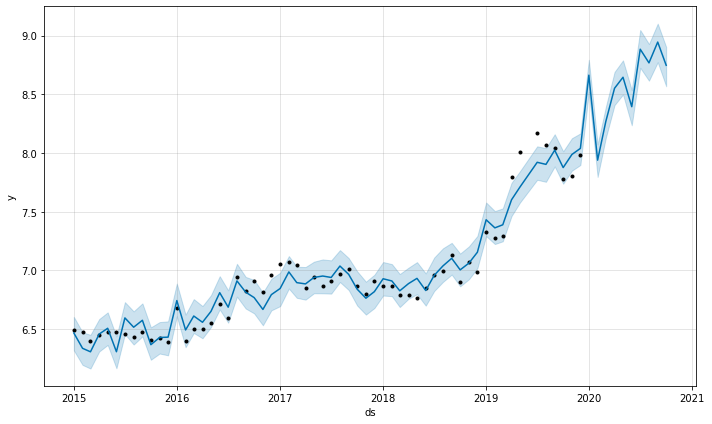

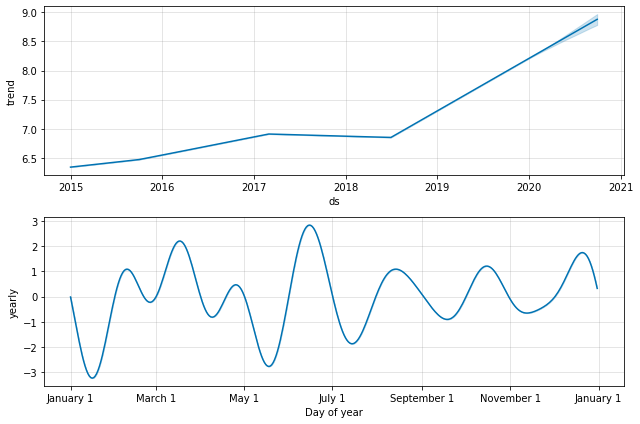

In [502]:
###Blcak points are th actual values and blue is the predicted values
fitting_Predict(a) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(           ds         yhat  yhat_lower  yhat_upper
 0  2015-01-01   606.075985    6.273610    6.536466
 1  2015-02-01   564.274561    6.216692    6.467178
 2  2015-03-01   688.398740    6.417468    6.658454
 3  2015-04-01   574.169961    6.221806    6.477510
 4  2015-05-01   589.316575    6.268690    6.506790
 5  2015-06-01   665.933002    6.376078    6.619974
 6  2015-07-01   710.566481    6.441963    6.697246
 7  2015-08-01   589.494735    6.260206    6.512224
 8  2015-09-01   680.502661    6.394297    6.654828
 9  2015-10-01   590.508189    6.266459    6.513275
 10 2015-11-01   611.582833    6.286881    6.550810
 11 2015-12-01   680.101839    6.400059    6.646623
 12 2016-01-01   731.017538    6.468148    6.727012
 13 2016-02-01   614.909202    6.290529    6.547982
 14 2016-03-01   656.594760    6.356798    6.610864
 15 2016-04-01   802.447644    6.564798    6.815182
 16 2016-05-01   743.667269    6.482295    6.739904
 17 2016-06-01   843.026471    6.613677    6.865992
 18 2016-07-

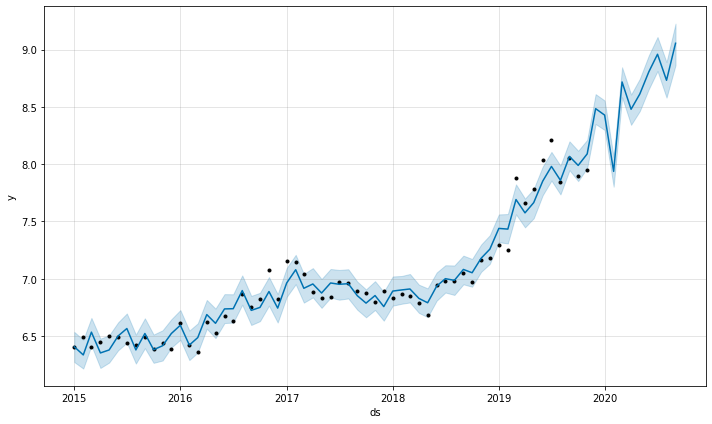

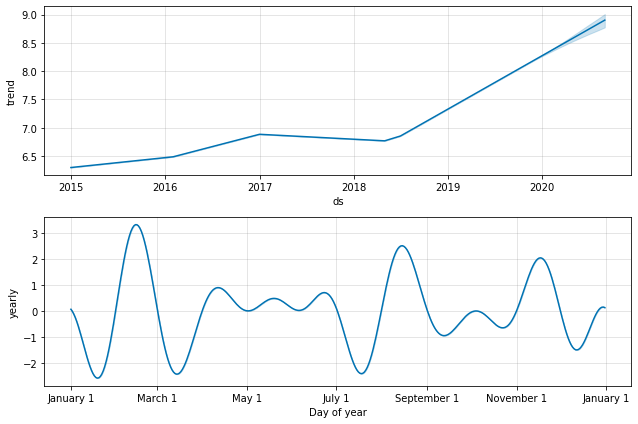

In [504]:
fitting_Predict(b)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(           ds          yhat  yhat_lower  yhat_upper
 0  2015-12-01    540.982819    6.113620    6.475157
 1  2016-01-01    780.687889    6.484697    6.847794
 2  2016-02-01    790.157016    6.497857    6.851063
 3  2016-03-01    664.882760    6.311572    6.673421
 4  2016-04-01    672.232313    6.330018    6.683726
 5  2016-05-01    689.299937    6.352926    6.696391
 6  2016-06-01    735.074498    6.442598    6.781283
 7  2016-07-01    713.330836    6.385766    6.736114
 8  2016-08-01    893.354971    6.620853    6.973910
 9  2016-09-01    789.503275    6.495597    6.849784
 10 2016-10-01    735.179411    6.426002    6.764843
 11 2016-11-01    912.792240    6.634357    6.984368
 12 2016-12-01    978.710572    6.706667    7.072419
 13 2017-02-01    894.052314    6.609722    6.976196
 14 2017-03-01    965.200780    6.691456    7.053146
 15 2017-05-01    984.885052    6.720682    7.074498
 16 2017-07-01   1103.980852    6.830911    7.185499
 17 2017-08-01   1073.260035    6.801934    7.

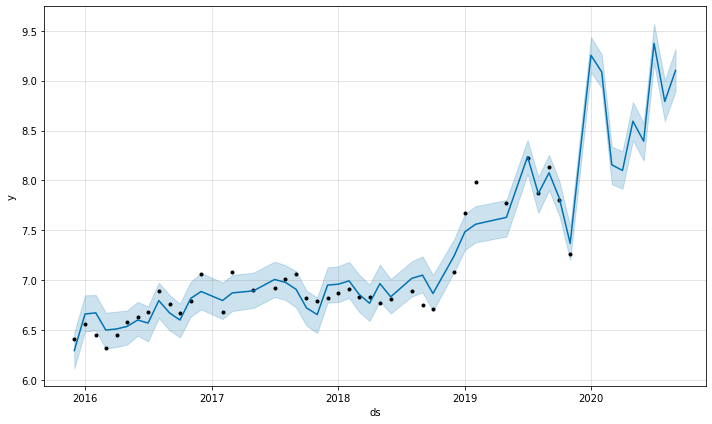

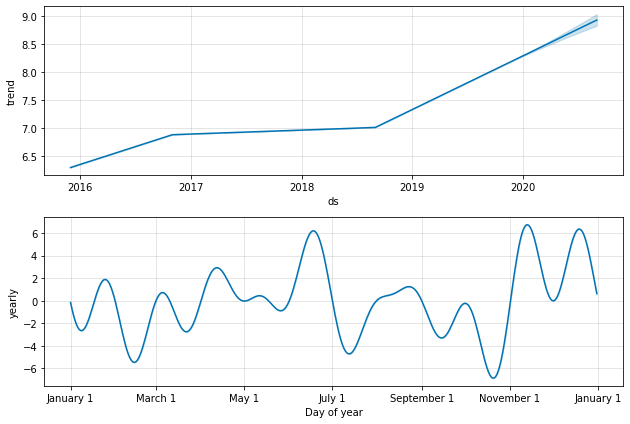

In [506]:
fitting_Predict(c)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(           ds         yhat  yhat_lower  yhat_upper
 0  2015-01-01   644.248751    6.329498    6.597257
 1  2015-02-01   565.303206    6.189550    6.480284
 2  2015-03-01   548.794549    6.165235    6.437506
 3  2015-04-01   638.278444    6.326677    6.601401
 4  2015-05-01   670.479912    6.369960    6.640228
 5  2015-06-01   549.142972    6.161521    6.441461
 6  2015-07-01   732.485286    6.454579    6.734987
 7  2015-08-01   676.556951    6.367227    6.657736
 8  2015-09-01   717.733293    6.435799    6.714513
 9  2015-10-01   583.086230    6.223583    6.500509
 10 2015-11-01   619.942958    6.302661    6.572286
 11 2015-12-01   621.683611    6.299586    6.572699
 12 2016-01-01   848.714838    6.594709    6.871993
 13 2016-02-01   660.890947    6.356758    6.633245
 14 2016-03-01   744.242174    6.474594    6.751381
 15 2016-04-01   705.633796    6.418400    6.691778
 16 2016-05-01   774.135017    6.509496    6.777127
 17 2016-06-01   907.788810    6.675200    6.956237
 18 2016-07-

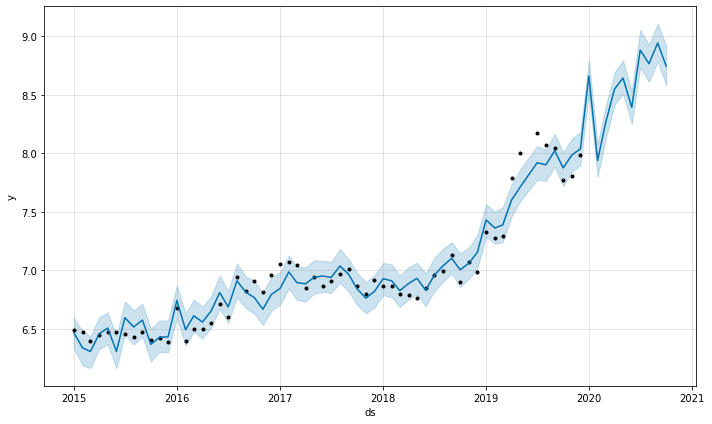

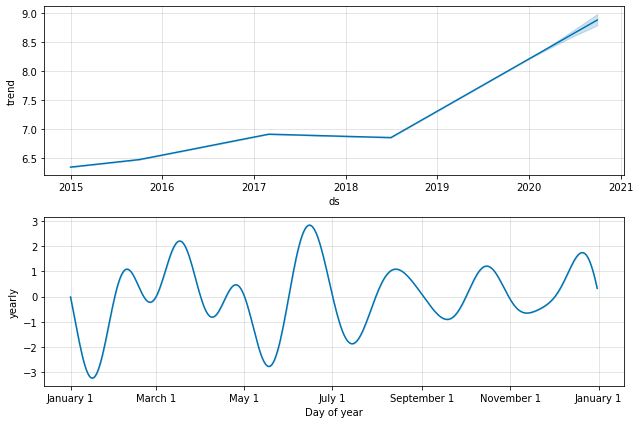

In [507]:
fitting_Predict(d)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.


(           ds         yhat  yhat_lower  yhat_upper
 0  2018-01-01  1086.938039    6.804580    7.190464
 1  2018-02-01  1106.962767    6.805129    7.204967
 2  2018-07-01  1209.192364    6.899217    7.286769
 3  2018-08-01  1231.879755    6.930960    7.313527
 4  2018-09-01  1255.178929    6.939190    7.328018
 5  2018-10-01  1337.086460    6.996921    7.378110
 6  2018-11-01  1427.980646    7.066399    7.466997
 7  2018-12-01  1521.909076    7.146617    7.513004
 8  2019-01-01  1625.682942    7.205710    7.588809
 9  2019-02-01  1736.532872    7.251642    7.661411
 10 2019-03-01  1843.138043    7.321322    7.727948
 11 2019-04-01  1968.815515    7.397918    7.768618
 12 2019-05-01  2098.589189    7.461465    7.842113
 13 2019-06-01  2241.623992    7.512735    7.907940
 14 2019-07-01  2388.257440    7.587484    7.969877
 15 2019-08-01  2549.033855    7.633936    8.040168
 16 2019-09-01  2720.633666    7.712746    8.117189
 17 2019-10-01  2897.689235    7.778658    8.165929
 18 2019-12-

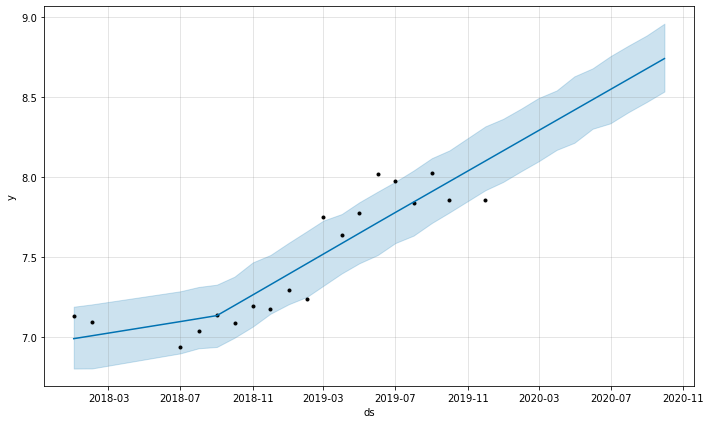

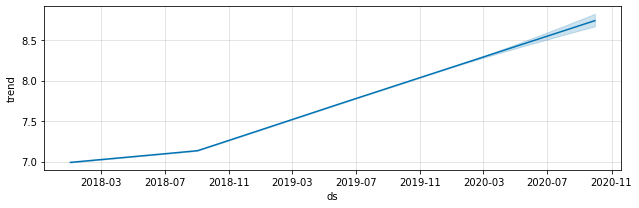

In [508]:
fitting_Predict(e)